In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:]
y = data[:, 1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [7]:
X.shape

(8000, 784)

In [8]:
layer_1 = Dense(100, activation="tanh", input_shape=[X.shape[1]])
layer_3 = Dense(50, activation="tanh")
layer_4 = Dense(y_hot.shape[1], activation="softmax")
model = Sequential()
model.add(layer_1)
model.add(layer_3)
model.add(layer_4)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=40, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
5360/5360 [==============================] - 0s 61us/step - loss: 1.4600 - acc: 0.5420
Epoch 2/40
5360/5360 [==============================] - 0s 25us/step - loss: 0.7225 - acc: 0.8049
Epoch 3/40
5360/5360 [==============================] - 0s 21us/step - loss: 0.5911 - acc: 0.8295
Epoch 4/40
5360/5360 [==============================] - 0s 21us/step - loss: 0.5098 - acc: 0.8522
Epoch 5/40
5360/5360 [==============================] - 0s 21us/step - loss: 0.4751 - acc: 0.8590
Epoch 6/40
5360/5360 [==============================] - 0s 20us/step - loss: 0.4517 - acc: 0.8636
Epoch 7/40
5360/5360 [==============================] - 0s 22us/step - loss: 0.4193 - acc: 0.8787
Epoch 8/40
5360/5360 [==============================] - 0s 23us/step - loss: 0.4265 - acc: 0.8705
Epoch 9/40
5360/5360 [==============================] - 0s 23us/step - loss: 0.3852 - acc: 0.8838
Epoch 10/40
5360/5360 [==============================] - 0s 23us/step 

In [11]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 36us/step


[0.32647143042448795, 0.8878787878787879]

In [12]:
np.argmax(model.predict(X_test[:1]), axis=1)

array([9])

In [13]:
y_test[0]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
model.predict(X_test[:1])

array([[6.8760774e-06, 8.8684510e-06, 2.0859113e-06, 1.9751885e-03,
        4.1354788e-03, 1.6605976e-04, 6.4740498e-06, 6.1780680e-04,
        9.0634049e-04, 9.9217480e-01]], dtype=float32)

[[0 7 6 4 1 9 5 8 2 3]]


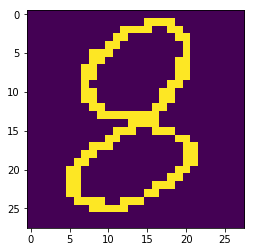

In [25]:
import cv2
one = cv2.imread("../datasets/nums/eight.jpeg")
gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
small = (small < 100).astype(int) * 255
print(np.argsort(model.predict(np.array([small.flatten()]))))
plt.imshow(small)